C:\Users\Cristian Aguirre\AppData\Local\Temp\ipykernel_24184\142505714.py:24: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, num_simulations, calc_second_order=True)


                     ST   ST_conf
interest_rate  0.999125  0.003142
volatility     0.998881  0.003359
                     S1   S1_conf
interest_rate  0.003200  0.002907
volatility     0.001705  0.003279
                                   S2  S2_conf
(interest_rate, volatility) -0.001281  0.00428


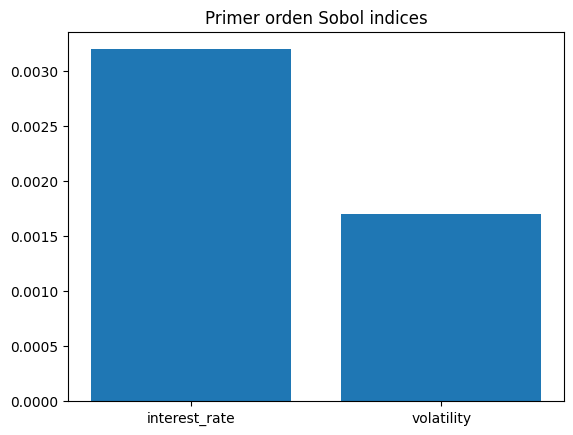

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol

np.random.seed(2023)

num_simulations = 1000
investment_horizon = 5
discount_rate = 0.1

def simulate_cash_flows(interest_rate, volatility):
    cash_flows = np.random.normal(500000, 100000 * volatility, size=(num_simulations, investment_horizon))
    discounted_cash_flows = cash_flows / (1 + discount_rate) ** np.arange(1, investment_horizon + 1)
    npv = np.sum(discounted_cash_flows, axis=1)
    return npv 

problem = {
    'num_vars': 2,
    'names': ['interest_rate', 'volatility'],
    'bounds': [[0.05, 0.15], [0.1, 0.3]]
}

param_values = saltelli.sample(problem, num_simulations, calc_second_order=True)

# Aquí generamos un único vector 1D que contiene todos los valores de NPV
# Para cada combinación de parámetros de entrada.
npv_values = np.concatenate([simulate_cash_flows(ir, v) for ir, v in param_values])

si = sobol.analyze(problem, npv_values, print_to_console=True)

plt.figure()
plt.bar(['interest_rate', 'volatility'], si['S1'])
plt.title('Primer orden Sobol indices')
plt.show()


Contribución total de las variables

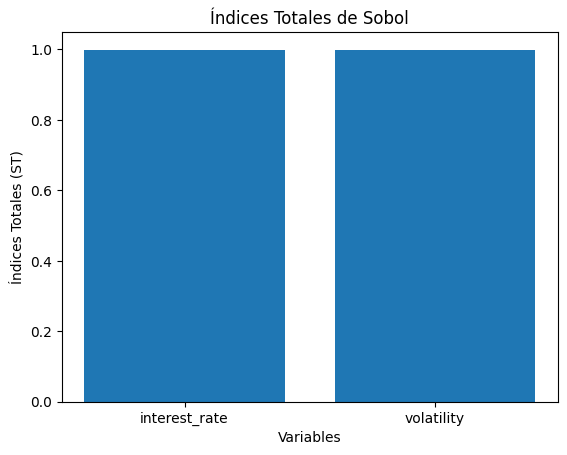

In [9]:
import matplotlib.pyplot as plt

# Extraer los índices totales y sus respectivas etiquetas desde el resultado del análisis de Sobol
ST = si['ST']
names = problem['names']

# Crear una figura y un eje
plt.figure()

# Crear un gráfico de barras para los índices totales
plt.bar(names, ST)

# Agregar etiquetas y título al gráfico
plt.xlabel('Variables')
plt.ylabel('Índices Totales (ST)')
plt.title('Índices Totales de Sobol')

# Mostrar el gráfico
plt.show()


Prompt utilizado para integrar un análisis de sensibilidad global utilizando indices sobol

https://chat.openai.com/share/445c862d-2165-4f7e-a2b7-adb5e17df7e7

NOTA: Se tuvieron que hacer modificaciones para integrarlo con nuestra simulación

**1. ¿Qué tanto influye cada variable en el VPN?**

De acuerdo con los resultados mostrados en la gráfica podemos ver que la tasa de interés está influyendo en un 0.32% de la varianza del VAN y la volatilidad en un 0.17%. A simple vista podemos ver que de manera individual, ninguna de estas variables tiene un impacto grande en la variabilidad del VAN.

**2. ¿Qué variable influye más? ¿Por qué cree que es esto?**

**3. ¿Hay una diferencia significativa en la influencia de cada variable? ¿Por qué?**

No, no hay una diferencia significativa, ya que ambas tienen valores muy pequeños y bastante similares. Es probable que esto se deba a que, en el modelo de simulación, ambos parámetros están modelados de tal manera que afectan de forma similar el cálculo del VAN.